In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('KaggleV2_May_2016.csv')
df.shape

(110527, 14)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [75]:
obj = df.select_dtypes(include = 'object').columns
obj = pd.DataFrame({'object':obj})
obj

,object
0,Gender
1,ScheduledDay
2,AppointmentDay
3,Neighbourhood
4,No-show


In [76]:
non_obj = df.select_dtypes(exclude = 'object').columns
non_obj = pd.DataFrame({'non-object':non_obj})
non_obj

,non-object
0,PatientId
1,AppointmentID
2,Age
3,Scholarship
4,Hipertension
5,Diabetes
6,Alcoholism
7,Handcap
8,SMS_received


In [3]:
print('중복 행 유/무: ',df.duplicated().sum()) # 중복 행 파악

중복 행 유/무:  0


In [78]:
df.isna().sum() # 결측치 파악

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [79]:
df.nunique() 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [80]:
# object type 

cols = df.select_dtypes(include = 'object').columns

for col in cols:
    print(df[col].value_counts())
    print('-'*30)

Gender
F    71840
M    38687
Name: count, dtype: int64
------------------------------
ScheduledDay
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: count, Length: 103549, dtype: int64
------------------------------
AppointmentDay
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z   

In [81]:
#float & int type

cols = df.select_dtypes(exclude = 'object').columns

for col in cols:
    print(df[col].describe())
    print('-'*30)

count    1.105270e+05
mean     1.474963e+14
std      2.560949e+14
min      3.921784e+04
25%      4.172614e+12
50%      3.173184e+13
75%      9.439172e+13
max      9.999816e+14
Name: PatientId, dtype: float64
------------------------------
count    1.105270e+05
mean     5.675305e+06
std      7.129575e+04
min      5.030230e+06
25%      5.640286e+06
50%      5.680573e+06
75%      5.725524e+06
max      5.790484e+06
Name: AppointmentID, dtype: float64
------------------------------
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64
------------------------------
count    110527.000000
mean          0.098266
std           0.297675
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64
------------------------------
count    110527.000000
mean 

In [234]:
# age가 음수가 있으므로 음수 제거
cond1 = df['Age']>=0
df = df[cond1]

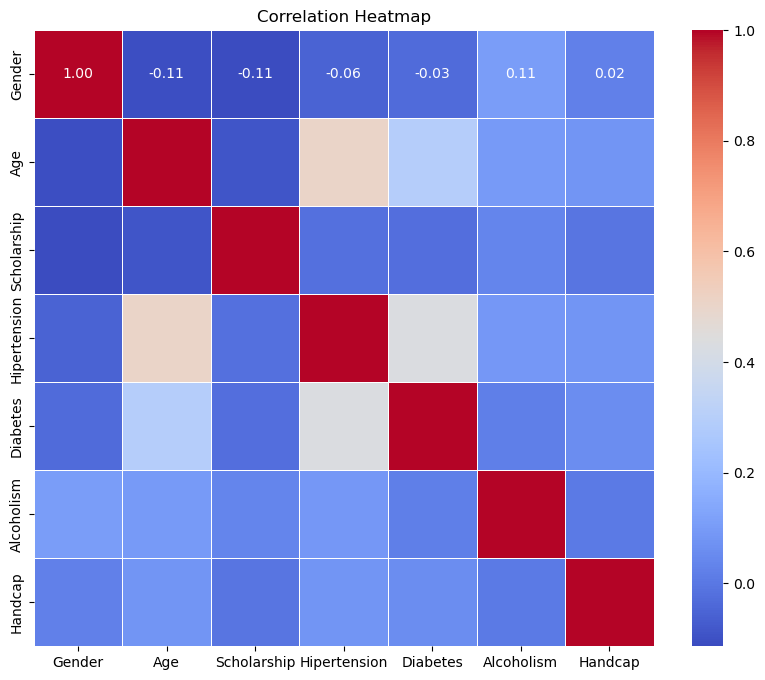

In [86]:
#당뇨 & 고혈압
df_copy = df.copy()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cols = df_copy.select_dtypes(include = 'object').columns
for col in cols:
    df_copy[col] = encoder.fit_transform(df_copy[col])

# 변수 간 상관관계 계산
corr_matrix = df_copy[['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap']].corr()

import seaborn as sns

# Heatmap 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# 제목 추가
plt.title('Correlation Heatmap')

# 그래프 표시
plt.show()


In [235]:
df["diabetes&Hipertension"] = df["Diabetes"]*df["Hipertension"]

In [5]:
x = df.drop(columns = ['No-show'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols = x.select_dtypes(include = 'object').columns
for col in cols:
    x[col] = encoder.fit_transform(x[col])

import numpy as np
y = np.where(df['No-show'] == 'No',0,1)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state = 42, test_size =0.3, stratify= y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)

import lightgbm as lgbm
lgbm = lgbm.LGBMClassifier(random_state = 42)
lgbm.fit(x_train, y_train)


from sklearn.metrics import f1_score
rf_pred = rf.predict(x_val)
lgbm_pred = lgbm.predict(x_val)

rf_score = f1_score(y_val, rf_pred)
lgbm_score = f1_score(y_val, lgbm_pred)


[LightGBM] [Info] Number of positive: 15623, number of negative: 61745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 991
[LightGBM] [Info] Number of data points in the train set: 77368, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201931 -> initscore=-1.374269
[LightGBM] [Info] Start training from score -1.374269


In [6]:
print('랜덤포레스트 f1-score : {:.4f}'.format(rf_score),'\n',
      'LGBM f1-score : {:.4f}'.format(lgbm_score))

랜덤포레스트 f1-score : 0.2021 
 LGBM f1-score : 0.0357


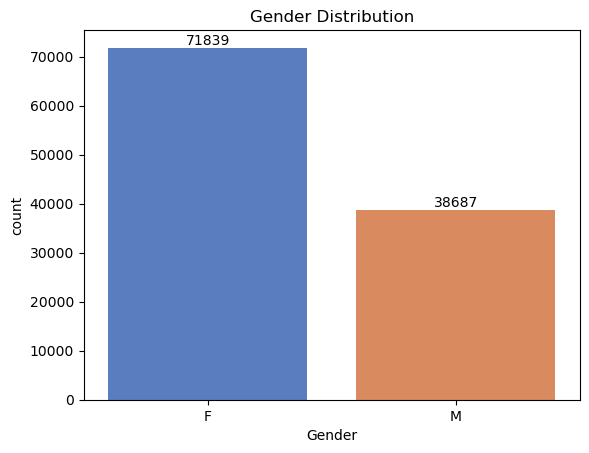

In [173]:
import seaborn as sns
ax = sns.countplot(x = 'Gender', data = df,palette='muted')
plt.title("Gender Distribution")
# 그래프 위에 개수 표시
for bar in ax.patches:
    count = int(bar.get_height())  # 막대의 높이는 해당 카운트
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙
        count,  # y 위치 (막대의 높이)
        f'{count}',  # 텍스트 내용
        ha='center',  # 가로 정렬
        va='bottom',  # 세로 정렬
        fontsize=10  # 글씨 크기
    )

plt.show()

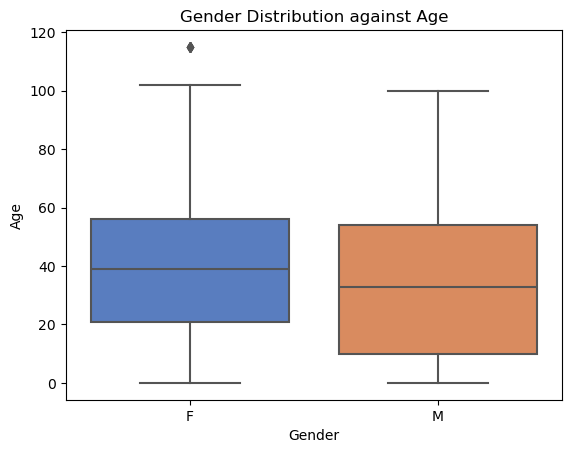

In [89]:
sns.boxplot(x = 'Gender', y = 'Age', data = df,palette='muted')
plt.title("Gender Distribution against Age")
plt.show()

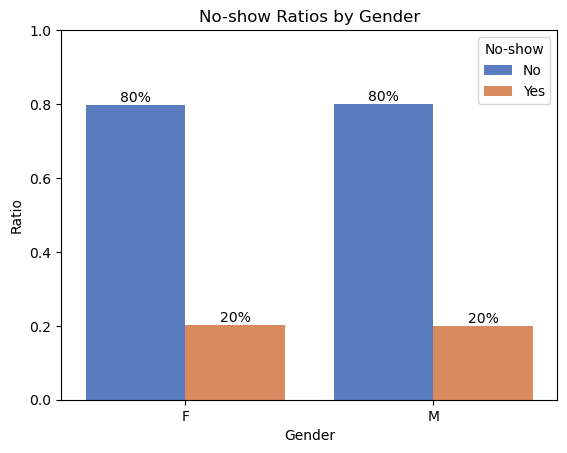

In [90]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('Gender')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='Gender',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by Gender')
plt.ylabel('Ratio')
plt.xlabel('Gender')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

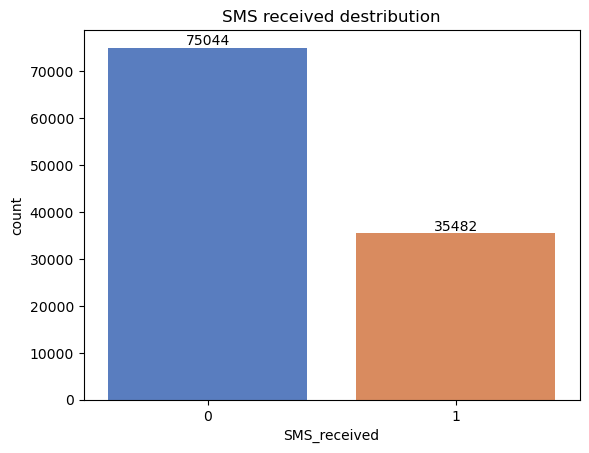

In [91]:
ax = sns.countplot(x = 'SMS_received', data = df,palette='muted')
plt.title("SMS received destribution")
# 그래프 위에 개수 표시
for bar in ax.patches:
    count = int(bar.get_height())  # 막대의 높이는 해당 카운트
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙
        count,  # y 위치 (막대의 높이)
        f'{count}',  # 텍스트 내용
        ha='center',  # 가로 정렬
        va='bottom',  # 세로 정렬
        fontsize=10  # 글씨 크기
    )
plt.show()

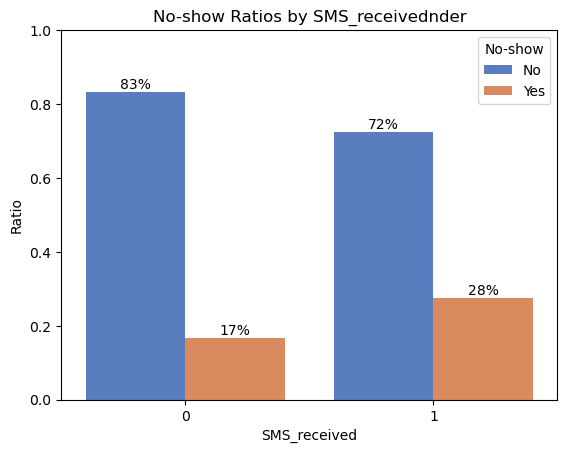

In [103]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('SMS_received')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='SMS_received',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by SMS_receivednder')
plt.ylabel('Ratio')
plt.xlabel('SMS_received')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

In [236]:
df.drop(columns = ['AppointmentID'], inplace = True)

In [29]:
#ScheduledDay 예약 생성 날짜 / AppointmentDay 실제 병원 방문 날짜
#AppointmentDay - ScheduledDay
# 날짜 형식 변환
# 올바른 방법: timedelta 값을 일 단위로 변환
df['ScheduledDay_date'] = df['ScheduledDay'].str[:10]
df['AppointmentDay_date'] = df['AppointmentDay'].str[:10]

df['ScheduledDay_date'] = pd.to_datetime(df['ScheduledDay_date'])
df['AppointmentDay_date'] = pd.to_datetime(df['AppointmentDay_date'])

df['day_diff'] = df['AppointmentDay_date'] - df['ScheduledDay_date']

df['day_diff'] = df['day_diff'].dt.days

In [32]:
pd.DataFrame({
    'day_diff':df['day_diff'],
    'time_diff':df['time_diff']
})

,day_diff,time_diff
0,0,-18.635556
1,0,-16.140833
2,0,-16.317778
3,0,-17.491944
4,0,-16.123056
...,...,...
110522,35,830.740278
110523,35,832.540833
110524,41,967.935556
110525,41,968.843611


In [17]:
df.shape

(110527, 17)

In [19]:
df['day_diff'].describe().iloc[1:]

mean     10.184253
std      15.255115
min       0.000000
25%       0.000000
50%       4.000000
75%      15.000000
max     179.000000
Name: day_diff, dtype: float64

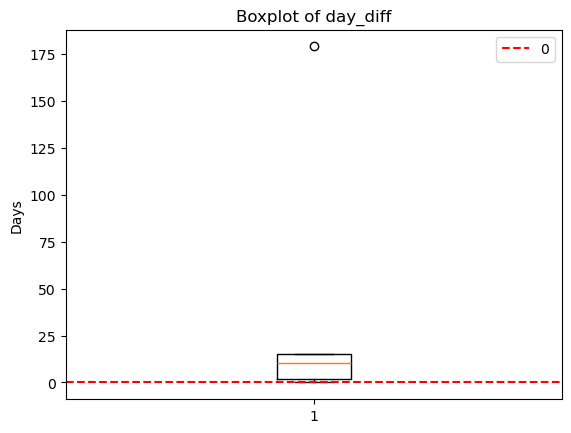

In [12]:
stats = df['day_diff'].describe().iloc[1:]

# 박스플롯 생성
plt.boxplot(stats)

# 0을 기준으로 기준선 추가
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='0')

# 그래프 표시
plt.legend()
plt.title('Boxplot of day_diff')
plt.ylabel('Days')
plt.show()

In [18]:
#음수 - > 방문날짜가 예약날짜보다 먼저라는건데 말이 안됨 -> 음수 삭제

cond1 = df['day_diff'] >= 0
df = df[cond1]

In [96]:
df['day_diff'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: day_diff, dtype: float64

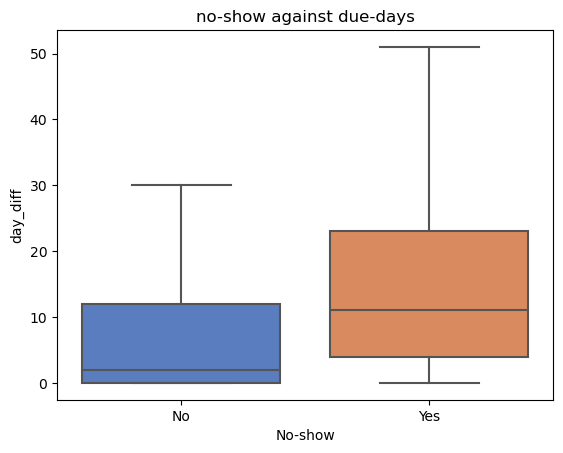

In [100]:
sns.boxplot(x = 'No-show', y = 'day_diff', data = df, showfliers = False,palette = 'muted')
plt.title('no-show against due-days')
plt.show()

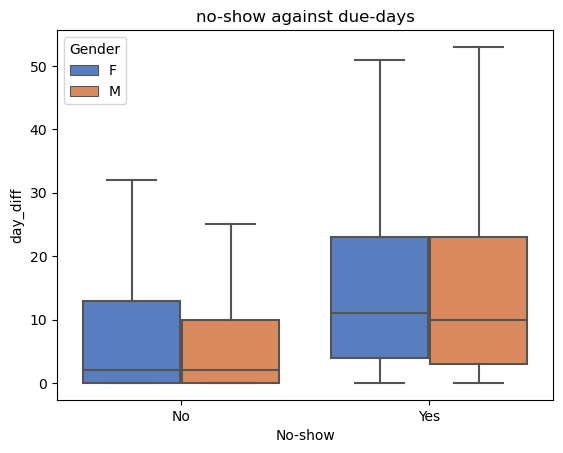

In [101]:
sns.boxplot(x = 'No-show', y = 'day_diff', data = df, hue = 'Gender', showfliers = False,palette = 'muted')
plt.title('no-show against due-days')
plt.show()

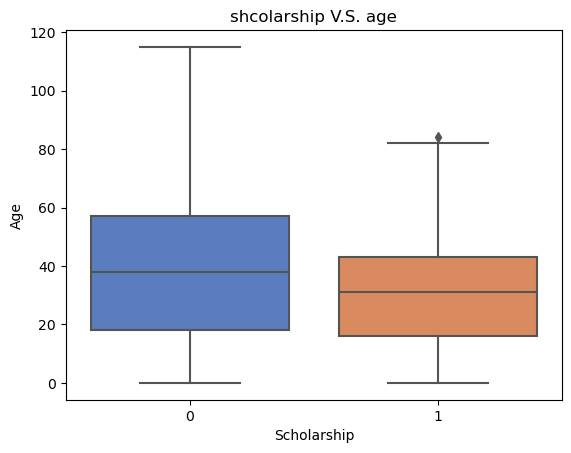

In [104]:
sns.boxplot(x = 'Scholarship', y = 'Age', data = df,palette = 'muted')
plt.title('shcolarship V.S. age')
plt.show()

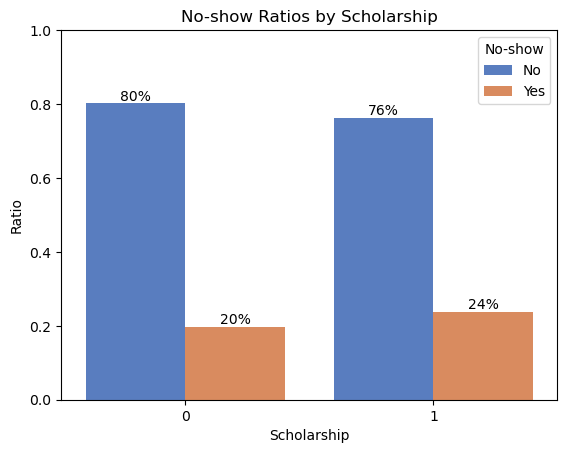

In [106]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('Scholarship')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='Scholarship',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by Scholarship')
plt.ylabel('Ratio')
plt.xlabel('Scholarship')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

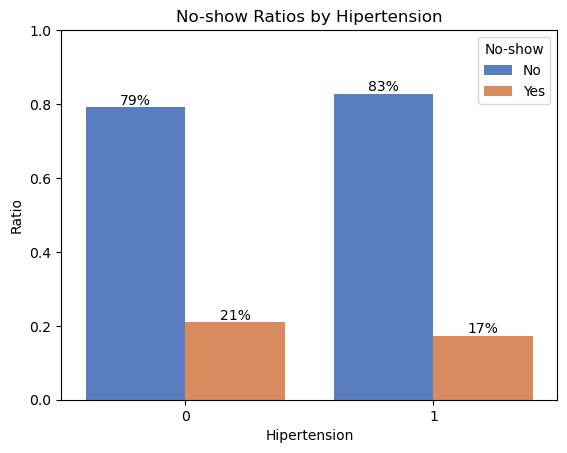

In [107]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('Hipertension')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='Hipertension',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by Hipertension')
plt.ylabel('Ratio')
plt.xlabel('Hipertension')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

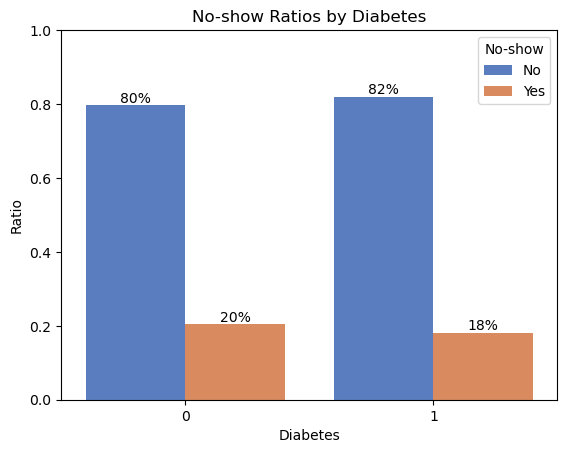

In [108]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('Diabetes')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='Diabetes',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by Diabetes')
plt.ylabel('Ratio')
plt.xlabel('Diabetes')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

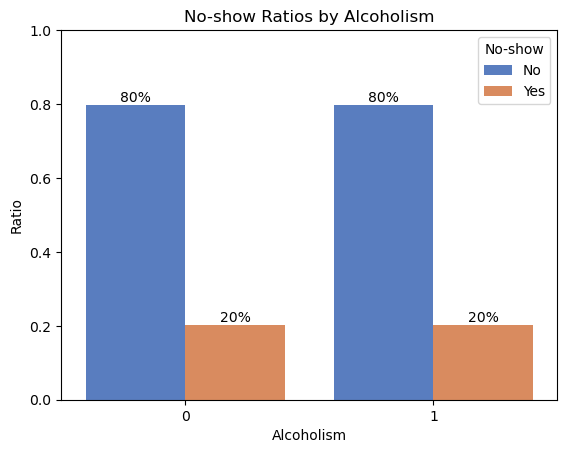

In [109]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('Alcoholism')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='Alcoholism',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by Alcoholism')
plt.ylabel('Ratio')
plt.xlabel('Alcoholism')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

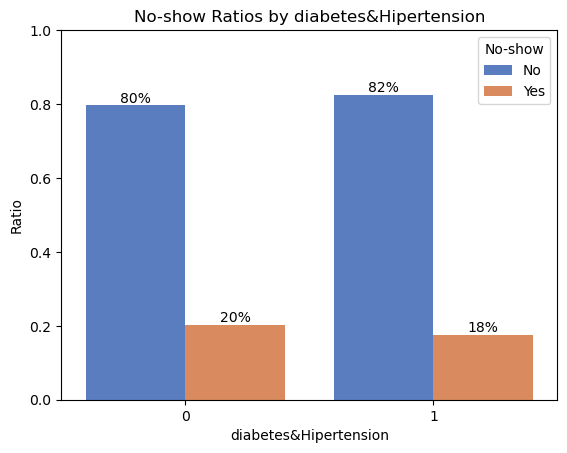

In [177]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('diabetes&Hipertension')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='diabetes&Hipertension',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by diabetes&Hipertension')
plt.ylabel('Ratio')
plt.xlabel('diabetes&Hipertension')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

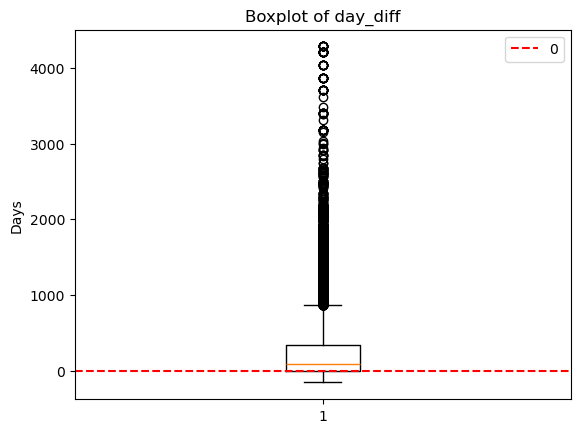

In [31]:
# 당일 예약(방문 접수) (AppointmentDay-ScheduledDay) < 0 -> 0 으로 / 나머지 예약 시간 차이 파악
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']) #예약이 먼저면 이 값이 더 낮음

df['time_diff'] = df['AppointmentDay']-df['ScheduledDay'] # 결과가 양수로 나오겠지?
df['time_diff'] = df['time_diff'].dt.total_seconds()/60/60 # 시간으로 반환

plt.boxplot(df['time_diff'])
# 0을 기준으로 기준선 추가
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='0')

# 그래프 표시
plt.legend()
plt.title('Boxplot of day_diff')
plt.ylabel('Days')
plt.show()

In [24]:
df['time_diff'].describe()

count    110522.000000
mean        233.156086
std         365.860561
min         -20.748333
25%          -8.307153
50%          83.394583
75%         343.695347
max        4285.316944
Name: time_diff, dtype: float64

In [ ]:
import numpy as np
df['time_diff'] = np.where(df['time_diff']<0, 0, df['time_diff'])
df['time_diff'] = round(df['time_diff'],0).astype(int)
df.head(2)


In [241]:
# 당일 예약 인 경우와 선예약 컬럼 추가
df['ReservationType'] = np.where(df['day_diff'] == 0 , 'SameDay','PreScheduled')
df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diabetes&Hipertension,ScheduledDay_date,AppointmentDay_date,day_diff,time_diff,ReservationType
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,2016-04-29,2016-04-29,0,0,SameDay
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,2016-04-29,2016-04-29,0,0,SameDay


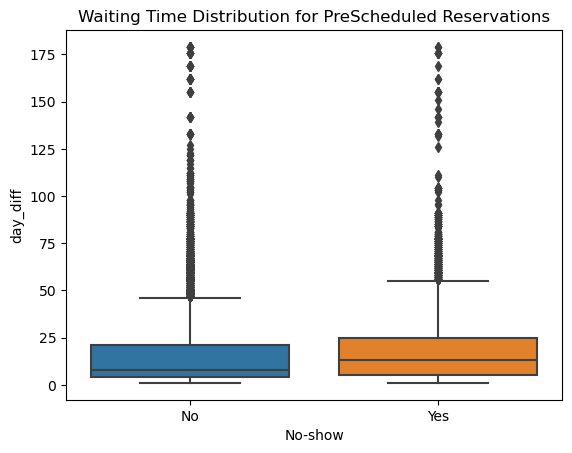

In [132]:
sns.boxplot(x='No-show', y='day_diff', data=df[df['ReservationType'] == 'PreScheduled'])
plt.title('Waiting Time Distribution for PreScheduled Reservations')
plt.show()


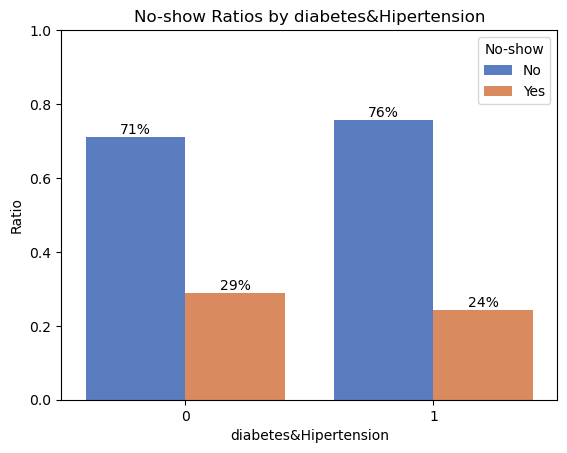

In [180]:
# 데이터 비율 계산
reservation_ratio = (
    df[df['ReservationType'] == 'PreScheduled']
    .groupby('diabetes&Hipertension')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='diabetes&Hipertension',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by diabetes&Hipertension')
plt.ylabel('Ratio')
plt.xlabel('diabetes&Hipertension')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

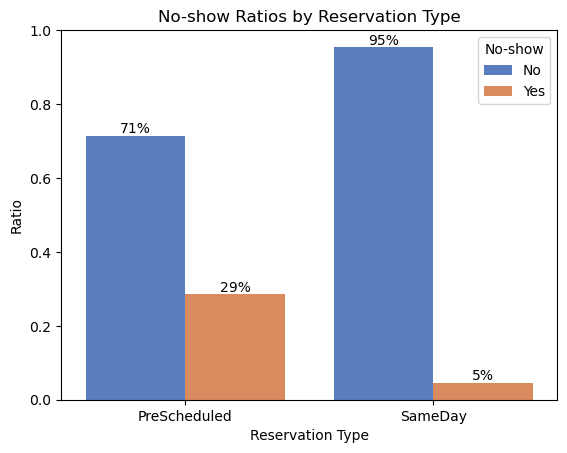

In [68]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('ReservationType')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='ReservationType',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted')

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by Reservation Type')
plt.ylabel('Ratio')
plt.xlabel('Reservation Type')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

In [242]:
# Appointment_weekday	방문일의 요일
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['Appointment_weekday'] = df['AppointmentDay'].dt.day_of_week # 0 월요일 ~ 6 일요일

df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diabetes&Hipertension,ScheduledDay_date,AppointmentDay_date,day_diff,time_diff,ReservationType,Appointment_weekday
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,2016-04-29,2016-04-29,0,0,SameDay,4
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,2016-04-29,2016-04-29,0,0,SameDay,4


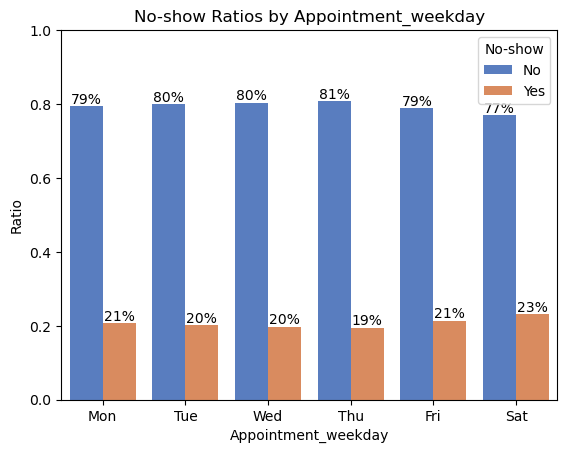

In [185]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('Appointment_weekday')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 요일 번호를 약어로 변환
weekday_mapping = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat'
}

# Appointment_weekday를 요일 약어로 변환
reservation_ratio['Appointment_weekday'] = reservation_ratio['Appointment_weekday'].map(weekday_mapping)

# 막대 그래프 생성
ax = sns.barplot(
    x='Appointment_weekday',  # 'Appointment_weekday'를 요일 약어로 사용
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by Appointment_weekday')
plt.ylabel('Ratio')
plt.xlabel('Appointment_weekday')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()


In [243]:
# is_weekend	예약일 또는 방문일이 주말인지 여부 
print(df['Appointment_weekday'].value_counts()) #6(일요일) 존재 X
df['is_weekend'] = np.where(df['Appointment_weekday'] == 5, 1, 0)

Appointment_weekday
2    25866
1    25638
0    22713
4    19019
3    17246
5       39
Name: count, dtype: int64


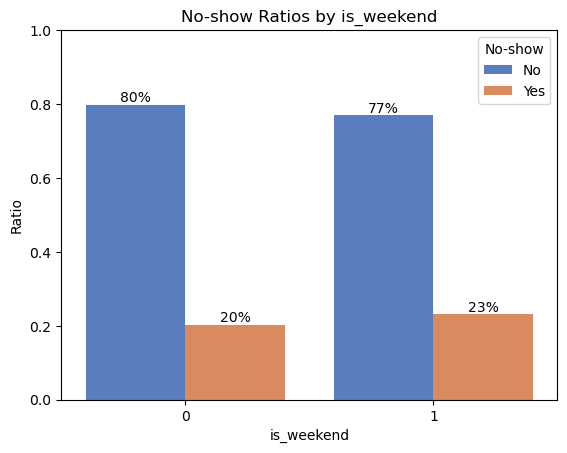

In [70]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('is_weekend')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='is_weekend',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by is_weekend')
plt.ylabel('Ratio')
plt.xlabel('is_weekend')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

In [107]:
print(df['is_weekend'].value_counts())

is_weekend
0    110482
1        39
Name: count, dtype: int64


In [108]:
cols = ['ScheduledDay','AppointmentDay']
df.drop(columns = cols, inplace = True)

In [109]:
df.head(2)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,AppointmentDay_date,day_diff,time_diff,ReservationType,Appointment_weekday,is_weekend
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0,0,SameDay,4,0
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,0,SameDay,4,0


In [110]:
len(df)

110521

In [ ]:
#과거-현재까지 no-show 횟수 합 <- no-show 횟수 많이 한 사람 또 no-show 가능성 높다고 추정
df['No-show'] = np.where(df['No-show']=='No',0,1)
df['Num_App_Missed'] = df.groupby('PatientId')['No-show'].transform('cumsum') #과거에 no-show한 전적 수

In [247]:
# 'No-show'가 'No'인 그룹 (이행)과 'Yes'인 그룹 (불이행)으로 분리
show_up_group = df[df['No-show'] == 0]  # 예약 이행 그룹
no_show_group = df[df['No-show'] == 1]  # 예약 불이행 그룹

# 이행 그룹과 불이행 그룹의 Num_App_Missed의 중간값과 평균값 비교
show_up_median = show_up_group['Num_App_Missed'].median()
no_show_median = no_show_group['Num_App_Missed'].median()

show_up_mean = show_up_group['Num_App_Missed'].mean()
no_show_mean = no_show_group['Num_App_Missed'].mean()

# 결과 출력
print(f"예약 이행 그룹 (No-show = 0) 중간값: {show_up_median}, 평균값: {show_up_mean}")
print(f"예약 불이행 그룹 (No-show = 1) 중간값: {no_show_median}, 평균값: {no_show_mean}")


예약 이행 그룹 (No-show = 0) 중간값: 0.0, 평균값: 0.17687938598977404
예약 불이행 그룹 (No-show = 1) 중간값: 1.0, 평균값: 1.3431029846732994


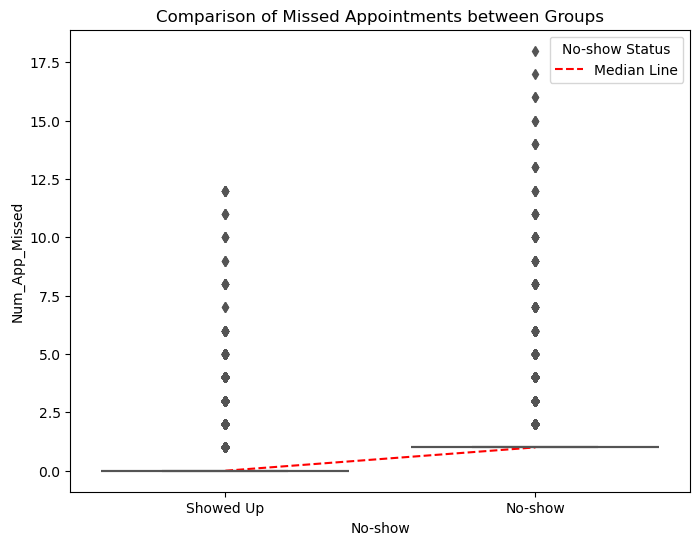

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 예약 이행 및 불이행 그룹으로 나누기
grouped = df.groupby('No-show')['Num_App_Missed']

# 그룹의 중간값, 평균값 계산
median_values = grouped.median()
mean_values = grouped.mean()

# 시각화: scatterplot 및 중간값, 평균값 선 추가
plt.figure(figsize=(8, 6))

# 예약 이행 그룹 (No-show = 0)과 불이행 그룹 (No-show = 1)의 스케일링된 값 시각화
sns.boxplot(x='No-show', y='Num_App_Missed', data=df, palette='muted')


# 중간값과 평균값 선 추가
plt.plot([0, 1], [median_values[0], median_values[1]], label='Median Line', color='red', linestyle='--')

# 그래프 꾸미기
plt.title('Comparison of Missed Appointments between Groups')
plt.xlabel('No-show')
plt.ylabel('Num_App_Missed')
plt.legend(title='No-show Status')
plt.xticks([0, 1], ['Showed Up', 'No-show'])
plt.show()


In [118]:
df.drop(columns = ['PatientId','ScheduledDay_date','AppointmentDay_date'], inplace = True)

In [119]:
# Handcap 0->0 / 나머지 1,2,3,4 - > 1로
df['Handcap'] = np.where(df['Handcap'] == 0 , 0,1)
df['Handcap'].value_counts()

Handcap
0    108282
1      2239
Name: count, dtype: int64

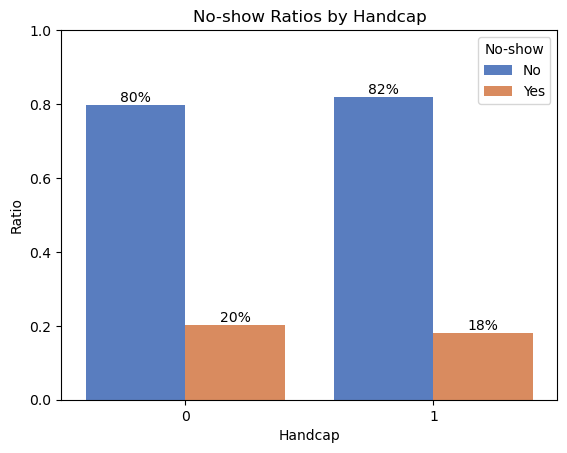

In [120]:
# 데이터 비율 계산
reservation_ratio = (
    df.groupby('Handcap')['No-show']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)

# 막대 그래프 생성
ax = sns.barplot(
    x='Handcap',
    y='Ratio',
    hue='No-show',
    data=reservation_ratio,
    palette='muted'
)

# 막대 위에 비율 텍스트 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # 비율이 0이 아닌 경우만 표시
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height, 
                f'{height:.0%}',  # 비율을 퍼센트 형식으로 표시
                ha='center', 
                va='bottom', 
                fontsize=10
            )

# 그래프 꾸미기
plt.title('No-show Ratios by Handcap')
plt.ylabel('Ratio')
plt.xlabel('Handcap')
plt.ylim(0, 1)  # 비율이므로 y축 범위를 0~1로 설정
plt.legend(title='No-show', loc='upper right')
plt.show()

#Modeling

In [271]:
x = df.drop(columns = ['No-show'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols = x.select_dtypes(include = 'object').columns
for col in cols:
    x[col] = encoder.fit_transform(x[col])

y = df['No-show']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state = 42, test_size =0.3, stratify= y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)

import lightgbm as lgbm
lgbm = lgbm.LGBMClassifier(random_state = 42)
lgbm.fit(x_train, y_train)


from sklearn.metrics import f1_score
rf_pred = rf.predict(x_val)
lgbm_pred = lgbm.predict(x_val)

rf_score = f1_score(y_val, rf_pred)
lgbm_score = f1_score(y_val, lgbm_pred)

[LightGBM] [Info] Number of positive: 15620, number of negative: 61744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 77364, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201903 -> initscore=-1.374445
[LightGBM] [Info] Start training from score -1.374445


In [275]:
a = pd.read_csv('KaggleV2_May_2016.csv')
a.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [276]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'day_diff', 'time_diff', 'ReservationType', 'Appointment_weekday',
       'is_weekend', 'Num_App_Missed', 'diabetes&Hipertension'],
      dtype='object')

In [274]:
x_train.shape

(77364, 16)

In [272]:
print('랜덤포레스트 f1-score : {:.4f}'.format(rf_score),'\n',
      'LGBM f1-score : {:.4f}'.format(lgbm_score))

랜덤포레스트 f1-score : 0.8175 
 LGBM f1-score : 0.8308


#Optuna 활용 -> 최적 파라미터 찾기

In [277]:
import optuna

x = df.drop(columns = ['No-show'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols = x.select_dtypes(include = 'object').columns

for col in cols:
    x[col] = encoder.fit_transform(x[col])

y = df['No-show']

from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state = 42, test_size = 0.3, stratify=y)
# x_train, x_val, y_train, y_val = train_test_split(x,y, random_state = 42, test_size = 0.3)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Objective 함수 정의 (하이퍼파라미터를 튜닝할 부분)
def objective(trial):
    # 하이퍼파라미터 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 2, 16)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    # 모델 훈련
    model = RandomForestClassifier(n_estimators=n_estimators, 
                                   max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   random_state=42)
    model.fit(x_train, y_train)
    
    # 예측 및 정확도 계산
    rf_pred = model.predict(x_val)
    rf_score = f1_score(y_val, rf_pred)
    
    return rf_score  # 최대화하려는 값 (여기서는 f1_score)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=100)  # 100번의 trial을 수행


# 최적의 하이퍼파라미터와 결과 출력
print('Best hyperparameters:', study_rf.best_params)
print('Best accuracy:', study_rf.best_value)

[I 2024-11-26 15:48:32,905] A new study created in memory with name: no-name-665d51d4-5d43-49f3-8057-c94ac0025c6f
[I 2024-11-26 15:48:43,747] Trial 0 finished with value: 0.8261015808947192 and parameters: {'n_estimators': 191, 'max_depth': 5, 'min_samples_split': 3}. Best is trial 0 with value: 0.8261015808947192.
[I 2024-11-26 15:48:49,959] Trial 1 finished with value: 0.8114071606994172 and parameters: {'n_estimators': 159, 'max_depth': 3, 'min_samples_split': 9}. Best is trial 0 with value: 0.8261015808947192.
[I 2024-11-26 15:48:58,225] Trial 2 finished with value: 0.8311409395973154 and parameters: {'n_estimators': 154, 'max_depth': 14, 'min_samples_split': 5}. Best is trial 2 with value: 0.8311409395973154.
[I 2024-11-26 15:49:03,320] Trial 3 finished with value: 0.8324288107202681 and parameters: {'n_estimators': 123, 'max_depth': 13, 'min_samples_split': 10}. Best is trial 3 with value: 0.8324288107202681.
[I 2024-11-26 15:49:07,178] Trial 4 finished with value: 0.830251875669

Best hyperparameters: {'n_estimators': 114, 'max_depth': 13, 'min_samples_split': 8}
Best accuracy: 0.8328418230563002


In [ ]:
import lightgbm as lgbm
from sklearn.metrics import f1_score

# Objective 함수 정의 (하이퍼파라미터를 튜닝할 부분)
def objective(trial):
    param = {
        'objective': 'binary',        # 이진 분류
        'metric': 'binary_logloss',        # 평가 지표
        'boosting_type': 'gbdt',          # 부스팅 방식
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),  # 트리의 리프 개수
        'max_depth': trial.suggest_int('max_depth', 3, 12),       # 트리의 최대 깊이
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),  # 학습률
        'n_estimators': trial.suggest_int('n_estimators', 50, 200), # 학습할 트리의 개수
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),   # 데이터 샘플링 비율
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)  # 트리별 컬럼 샘플링 비율
    }
    
    # 모델 훈련
    model = lgbm.LGBMClassifier(**param)

    model.fit(x_train, y_train)
    
    # 예측 및 정확도 계산
    lgbm_pred = model.predict(x_val)
    lgbm_score = f1_score(y_val, rf_pred)
    
    return lgbm_score  # 최대화하려는 값 (여기서는 f1_score)

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective, n_trials=100)  # 100번의 trial을 수행


# 최적의 하이퍼파라미터와 결과 출력
print('Best hyperparameters:', study_lgbm.best_params)
print('Best accuracy:', study_lgbm.best_value)

In [279]:
print('RandomForest','\n',
      'Best f1-score : {:.4f}'.format(study_rf.best_value),'\n',
      'Best hyperparameters : ',study_rf.best_params,'\n',
      'LGBM','\n',
      'Best f1-score : {:.4f}'.format(study_lgbm.best_value),'\n',
      'Best hyperparameters : ',study_lgbm.best_params)

RandomForest 
 Best f1-score : 0.8328 
 Best hyperparameters :  {'n_estimators': 114, 'max_depth': 13, 'min_samples_split': 8} 
 LGBM 
 Best f1-score : 0.8175 
 Best hyperparameters :  {'num_leaves': 37, 'max_depth': 10, 'learning_rate': 0.022490834871406247, 'n_estimators': 73, 'subsample': 0.7705661960067122, 'colsample_bytree': 0.8612493305521229}


In [1]:
# 최종 모델
import pandas as pd
df = pd.read_csv('df_final.csv')
x = df.drop(columns = ['No-show'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols = x.select_dtypes(include = 'object').columns

for col in cols:
    x[col] = encoder.fit_transform(x[col])

df['No-show'] = encoder.fit_transform(df['No-show'])
y = df['No-show']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state = 42, test_size = 0.3, stratify=y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, n_estimators=114, max_depth=13, min_samples_split=8)
rf.fit(x_train, y_train)

rf_pred_train = rf.predict(x_train)
rf_pred = rf.predict(x_val)

rf_pred_proba_train = rf.predict_proba(x_train)
rf_pred_proba = rf.predict_proba(x_val)


In [2]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

rf_accuracy = accuracy_score(y_val,rf_pred)
rf_recall = recall_score(y_val, rf_pred)
rf_precision = precision_score(y_val, rf_pred)
rf_score = f1_score(y_val, rf_pred)

print('RandomForest')
print('accuracy_score : {:.4f}'.format(rf_accuracy))
print('recall_score : {:.4f}'.format(rf_recall))
print('precision_score : {:.4f}'.format(rf_precision))
print('f1-score : {:.4f}'.format(rf_score))

RandomForest
accuracy_score : 0.9248
recall_score : 0.9281
precision_score : 0.7553
f1-score : 0.8328


In [ ]:
#df.to_csv('df_final.csv',index = False)

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay

# Confusion Matrix 계산 및 시각화
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[ "Show","No-show"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# ROC-AUC Curve 계산 및 시각화
def plot_roc_auc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Train)")
    plt.legend(loc="lower right")
    plt.show()


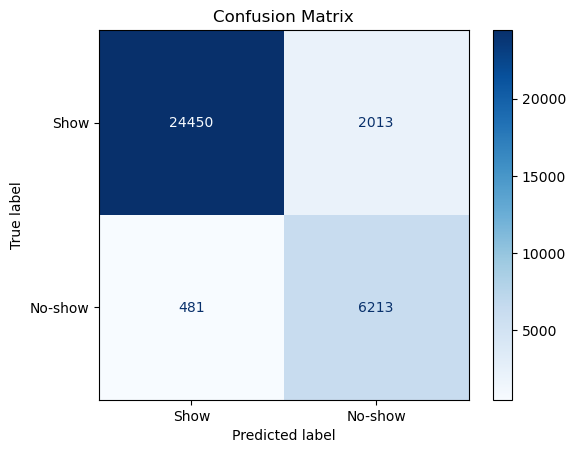

In [4]:
plot_confusion_matrix(y_val, rf_pred)

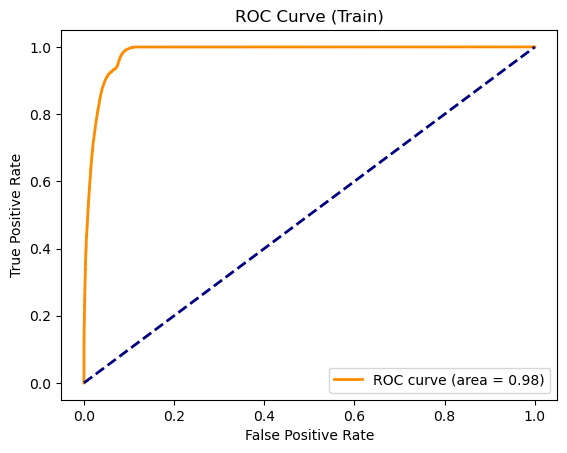

In [12]:
plot_roc_auc_curve(y_train, rf_pred_proba_train[:,1])

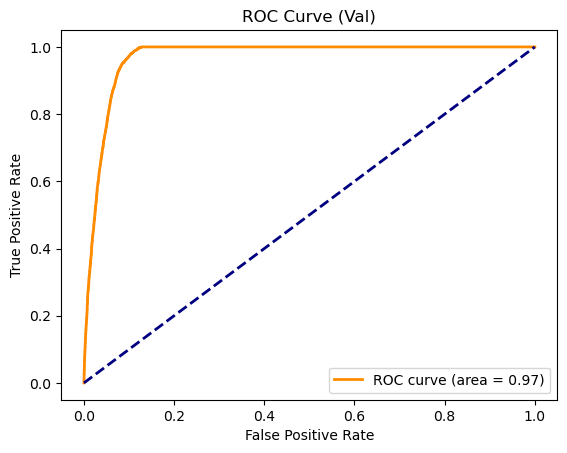

In [10]:
plot_roc_auc_curve(y_val, rf_pred_proba[:,1])

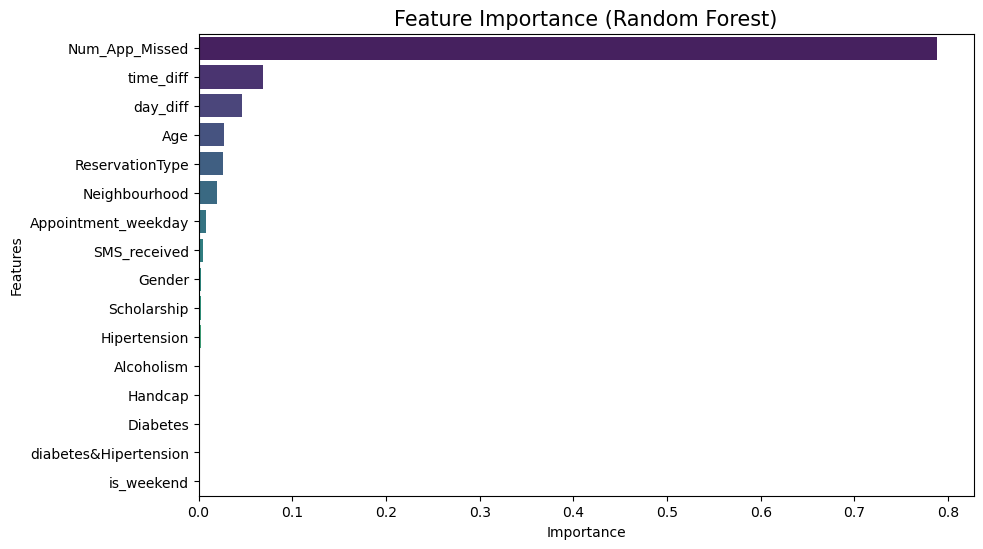

In [31]:
# Feature Importance 가져오기
importances = rf.feature_importances_

# 중요도를 내림차순으로 정렬
indices = importances.argsort()[::-1]

import seaborn as sns
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=x_val.columns[indices], palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=15)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [52]:
df = pd.read_csv('KaggleV2_May_2016.csv')
df_group = df.groupby('Neighbourhood').count().reset_index()
no_show_top_5 = df_group.sort_values('No-show',ascending = False)[['Neighbourhood','No-show']].iloc[:5,0]
no_show_bottom_5 = df_group.sort_values('No-show',ascending = False)[['Neighbourhood','No-show']].iloc[-5:,0]
df_f = pd.read_csv("df_final.csv")

cond1 = df_f['Neighbourhood'].isin(no_show_top_5)
cond2 = df_f['Neighbourhood'].isin(no_show_bottom_5)
df_top = df_f[cond1]
df_bottom = df_f[cond2]

C:\Users\denny\AppData\Local\Temp\ipykernel_16764\893047800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Group'] = 'Top 5 Neighbourhoods'
C:\Users\denny\AppData\Local\Temp\ipykernel_16764\893047800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bottom['Group'] = 'Bottom 5 Neighbourhoods'
C:\Users\denny\AppData\Local\Temp\ipykernel_16764\893047800.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Group', y='day_diff', data=combined

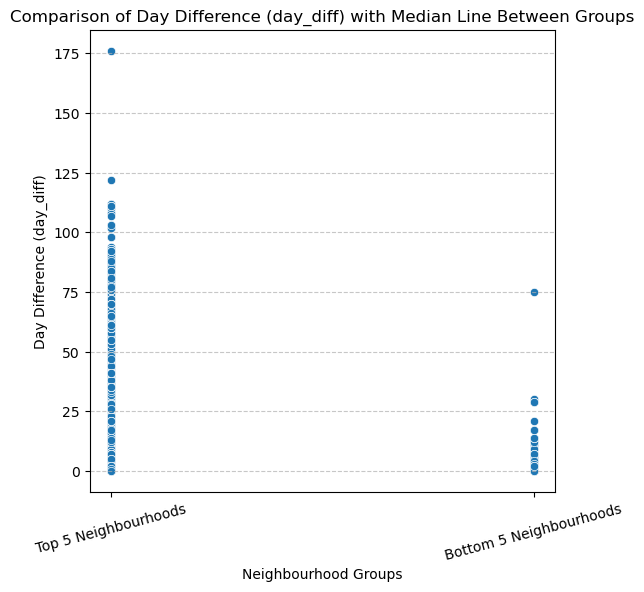

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터를 두 그룹으로 분리
df_top['Group'] = 'Top 5 Neighbourhoods'
df_bottom['Group'] = 'Bottom 5 Neighbourhoods'
combined_df = pd.concat([df_top, df_bottom])

# 각 그룹의 중앙값 계산
median_top = df_top['day_diff'].median()
median_bottom = df_bottom['day_diff'].median()

# Boxplot 시각화
plt.figure(figsize=(6,6))
sns.scatterplot(x='Group', y='day_diff', data=combined_df, palette='Set2')



# 그래프 꾸미기
plt.title('Comparison of Day Difference (day_diff) with Median Line Between Groups')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Day Difference (day_diff)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [13]:
# SHAP 값 계산
import shap
explainer = shap.TreeExplainer(rf)  # RandomForest 모델에 맞는 explainer 사용
shap_values = explainer.shap_values(x_val)  # SHAP 값 계산

In [21]:
feature_names = x_val.columns ## 변수명

import numpy as np
## 변수 중요도
for i in range(x_val.shape[1]):
    feature_imp = np.mean(np.abs(shap_values[:, i]))
    print('{}의 중요도 :{:.7f}'.format(feature_names[i],feature_imp))

Gender의 중요도 :0.0016005
Age의 중요도 :0.0133442
Neighbourhood의 중요도 :0.0031104
Scholarship의 중요도 :0.0013857
Hipertension의 중요도 :0.0017667
Diabetes의 중요도 :0.0003820
Alcoholism의 중요도 :0.0004957
Handcap의 중요도 :0.0003238
SMS_received의 중요도 :0.0026898
day_diff의 중요도 :0.0260029
time_diff의 중요도 :0.0351836
ReservationType의 중요도 :0.0169507
Appointment_weekday의 중요도 :0.0027380
is_weekend의 중요도 :0.0000048
Num_App_Missed의 중요도 :0.2491420
diabetes&Hipertension의 중요도 :0.0002695


In [27]:
print(shap_values.shape, x_val.shape)

(33157, 16, 2) (33157, 16)


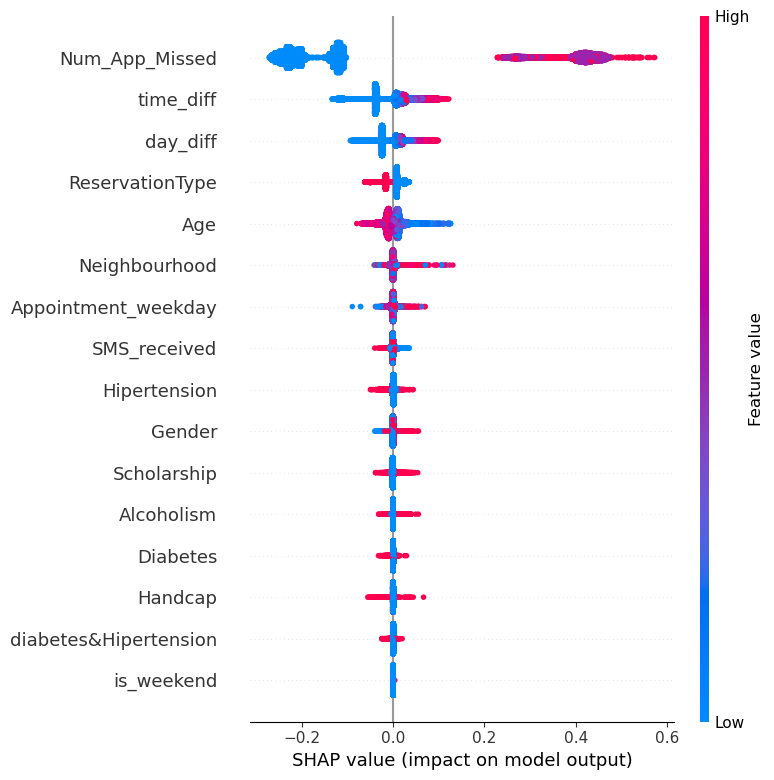

In [28]:
# dot plot 시각화
# 클래스 1 (Positive Class)에 대한 SHAP 값 선택
shap_values_class_1 = shap_values[..., 1]

# Dot plot 시각화
plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values_class_1, x_val, plot_type="dot")
plt.show()
